In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import feature_scoring

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import pickle

from collections import Counter

import gmatch4py as gm

C:\Users\IvS\anaconda3\envs\calibration_1_py9\lib\site-packages\ema_workbench\em_framework\__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
<frozen importlib._bootstrap>:228: UserWarning: To obtain optimal results install the Cython 'munkres' module at  https://github.com/jfrelinger/cython-munkres-wrapper


In [2]:
data = {}

#Add GT
experiments, outcomes = load_results("Results_EMA_Graph_GT_hpc_10000.tar.gz")
del experiments["policy"]
del experiments["scenario"]
del experiments["model"]

# outcomes["L1 distance"] = outcomes.pop("total_distance")
# outcomes["kpi transport cost"] = outcomes.pop("transport_cost")

data[37494] = {"experiments": experiments, "outcomes": outcomes}

In [59]:
# experiments.rename(columns=lambda x: x.replace('wholesales_', 'warehouse_'), inplace=True)
# experiments.rename(columns=lambda x: x.replace('large_retailer_', 'distributor_'), inplace=True)
# experiments.rename(columns=lambda x: x.replace('small_retailer_', 'hospital_'), inplace=True)

In [3]:
experiments.columns

Index(['export_port_air_time_max', 'export_port_air_time_min',
       'export_port_air_time_mode', 'export_port_sea_time_max',
       'export_port_sea_time_min', 'export_port_sea_time_mode',
       'import_prob_extracting_air', 'import_prob_extracting_sea',
       'import_wait_on_steck_time_air_max',
       'import_wait_on_steck_time_air_min',
       'import_wait_on_steck_time_sea_max',
       'import_wait_on_steck_time_sea_min', 'interarrival_time',
       'large_retailer_time', 'manufacturing_time', 'small_retailer_time',
       'transit_port_air_time_max', 'transit_port_air_time_min',
       'transit_port_air_time_mode', 'transit_port_sea_time_max',
       'transit_port_sea_time_min', 'transit_port_sea_time_mode',
       'wholesales_consolidator_pickuptime_max',
       'wholesales_consolidator_pickuptime_min',
       'wholesales_consolidator_pickuptime_mode',
       'wholesales_consolidator_prob_on_container',
       'wholesales_consolidator_time_max', 'wholesales_consolidator_time_

In [4]:
directory = os.getcwd()
for filename in os.listdir(directory+"/graphs/"):
    num = int(filename.split("_")[-1].split(".")[0])
    exp, outcomes = load_results("./graphs/"+filename)
    del exp["policy"]
    del exp["scenario"]
    del exp["model"]

    # exp.rename(columns=lambda x: x.replace('wholesales_', 'warehouse_'), inplace=True)
    # exp.rename(columns=lambda x: x.replace('large_retailer_', 'distributor_'), inplace=True)
    # exp.rename(columns=lambda x: x.replace('small_retailer_', 'hospital_'), inplace=True)
        
    data[num] = {"experiments": exp, "outcomes": outcomes}

In [4]:
# #Add other graphs
# num_graph = [400, 15000, 37890]
# for num in num_graph:
#     exp, outcomes = load_results(f"Results_EMA_Graph_G_{num}.tar.gz")
#     del exp["policy"]
#     del exp["scenario"]
#     del exp["model"]
    
#     outcomes["manhattan_distance"] = outcomes.pop("total_distance")
#     outcomes["kpi_transport_cost"] = outcomes.pop("transport_cost")
        
#     data[num] = {"experiments": exp, "outcomes": outcomes}

In [11]:
experiments

,export_port_air_time_max,export_port_air_time_min,export_port_air_time_mode,export_port_sea_time_max,export_port_sea_time_min,export_port_sea_time_mode,import_prob_extracting_air,import_prob_extracting_sea,import_wait_on_steck_time_air_max,import_wait_on_steck_time_air_min,...,wholesales_consolidator_pickuptime_max,wholesales_consolidator_pickuptime_min,wholesales_consolidator_pickuptime_mode,wholesales_consolidator_prob_on_container,wholesales_consolidator_time_max,wholesales_consolidator_time_min,wholesales_consolidator_time_mode,wholesales_distributor_time_max,wholesales_distributor_time_min,wholesales_distributor_time_mode
0,2.489782,0.251745,1.134865,4.076097,0.891929,2.106012,0.442976,0.297102,1.787816,0.285285,...,13.162410,7.020737,10.704915,0.624444,2.938707,2.526315,4.082799,6.208726,3.456686,7.280576
1,1.147219,0.668956,1.063538,4.958726,0.870772,1.942061,0.261379,0.458856,1.146782,0.249974,...,17.109456,2.270157,3.755018,0.746598,1.620824,0.887569,2.170294,1.571171,9.196428,6.653831
2,1.391826,0.617205,1.285155,4.168260,1.659866,2.323098,0.331927,0.763435,1.936118,0.412518,...,12.753392,2.518688,12.135337,0.368256,7.696024,2.887078,0.634402,0.774196,1.789921,5.994657
3,1.155069,0.658822,1.083140,3.594880,1.865359,1.787459,0.911659,0.504062,0.521279,0.607905,...,8.496971,6.297867,2.214761,0.779523,1.155496,3.520306,0.968869,5.734599,2.067102,6.428947
4,1.496158,0.285767,1.770744,1.262850,1.835502,1.963371,0.558404,0.672664,1.162998,0.585407,...,17.929738,6.575079,17.555216,0.300890,5.013007,6.156557,4.054551,3.702034,6.229687,1.795909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.937057,0.700618,1.797948,4.544880,0.599798,2.310374,0.095888,0.916321,0.424284,0.652796,...,7.443819,7.886468,19.182964,0.304271,3.693662,2.137412,6.515234,6.626602,0.578716,7.897751
9996,2.018985,0.649436,0.500953,3.701624,1.415555,2.998807,0.410961,0.964333,1.881494,0.424942,...,4.351003,3.005752,1.185547,0.573519,7.396475,6.852408,9.054053,6.978920,4.405031,2.957217
9997,0.499101,0.757004,1.693162,3.584629,1.589006,1.433340,0.865201,0.957063,1.165056,0.521497,...,17.678194,4.713592,1.468685,0.389784,8.841305,5.504093,3.558724,8.389426,8.839541,8.078430
9998,1.442365,0.761048,1.981284,3.079278,0.651905,2.069167,0.963738,0.767209,1.585974,0.484298,...,8.117098,1.681145,2.393116,0.215993,7.498094,8.207454,7.811628,6.609634,4.634721,5.674651


In [5]:
experiments

,export_port_air_time_max,export_port_air_time_min,export_port_air_time_mode,export_port_sea_time_max,export_port_sea_time_min,export_port_sea_time_mode,import_prob_extracting_air,import_prob_extracting_sea,import_wait_on_steck_time_air_max,import_wait_on_steck_time_air_min,...,wholesales_consolidator_pickuptime_max,wholesales_consolidator_pickuptime_min,wholesales_consolidator_pickuptime_mode,wholesales_consolidator_prob_on_container,wholesales_consolidator_time_max,wholesales_consolidator_time_min,wholesales_consolidator_time_mode,wholesales_distributor_time_max,wholesales_distributor_time_min,wholesales_distributor_time_mode
0,2.489782,0.251745,1.134865,4.076097,0.891929,2.106012,0.442976,0.297102,1.787816,0.285285,...,13.162410,7.020737,10.704915,0.624444,2.938707,2.526315,4.082799,6.208726,3.456686,7.280576
1,1.147219,0.668956,1.063538,4.958726,0.870772,1.942061,0.261379,0.458856,1.146782,0.249974,...,17.109456,2.270157,3.755018,0.746598,1.620824,0.887569,2.170294,1.571171,9.196428,6.653831
2,1.391826,0.617205,1.285155,4.168260,1.659866,2.323098,0.331927,0.763435,1.936118,0.412518,...,12.753392,2.518688,12.135337,0.368256,7.696024,2.887078,0.634402,0.774196,1.789921,5.994657
3,1.155069,0.658822,1.083140,3.594880,1.865359,1.787459,0.911659,0.504062,0.521279,0.607905,...,8.496971,6.297867,2.214761,0.779523,1.155496,3.520306,0.968869,5.734599,2.067102,6.428947
4,1.496158,0.285767,1.770744,1.262850,1.835502,1.963371,0.558404,0.672664,1.162998,0.585407,...,17.929738,6.575079,17.555216,0.300890,5.013007,6.156557,4.054551,3.702034,6.229687,1.795909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.937057,0.700618,1.797948,4.544880,0.599798,2.310374,0.095888,0.916321,0.424284,0.652796,...,7.443819,7.886468,19.182964,0.304271,3.693662,2.137412,6.515234,6.626602,0.578716,7.897751
9996,2.018985,0.649436,0.500953,3.701624,1.415555,2.998807,0.410961,0.964333,1.881494,0.424942,...,4.351003,3.005752,1.185547,0.573519,7.396475,6.852408,9.054053,6.978920,4.405031,2.957217
9997,0.499101,0.757004,1.693162,3.584629,1.589006,1.433340,0.865201,0.957063,1.165056,0.521497,...,17.678194,4.713592,1.468685,0.389784,8.841305,5.504093,3.558724,8.389426,8.839541,8.078430
9998,1.442365,0.761048,1.981284,3.079278,0.651905,2.069167,0.963738,0.767209,1.585974,0.484298,...,8.117098,1.681145,2.393116,0.215993,7.498094,8.207454,7.811628,6.609634,4.634721,5.674651


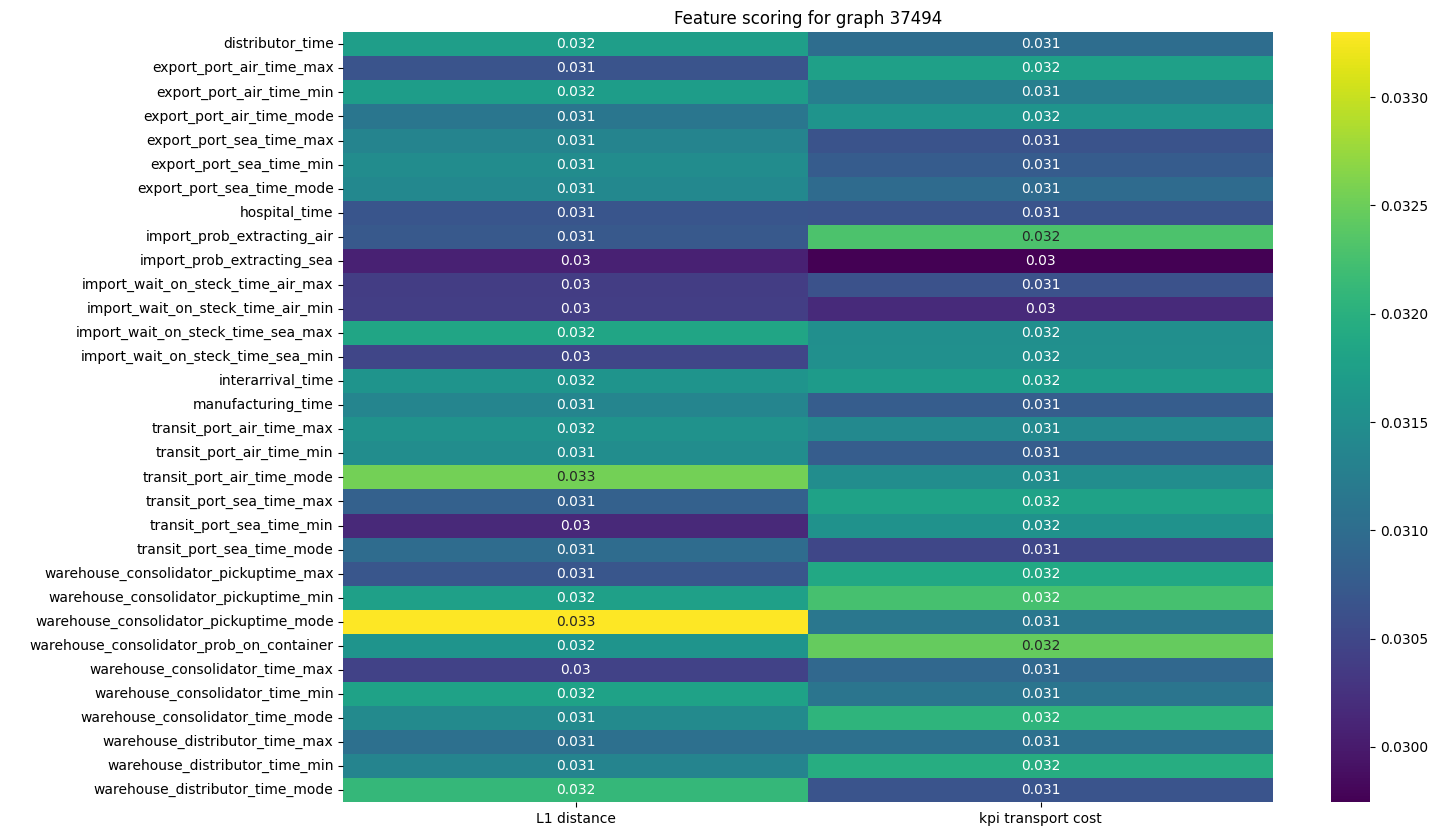

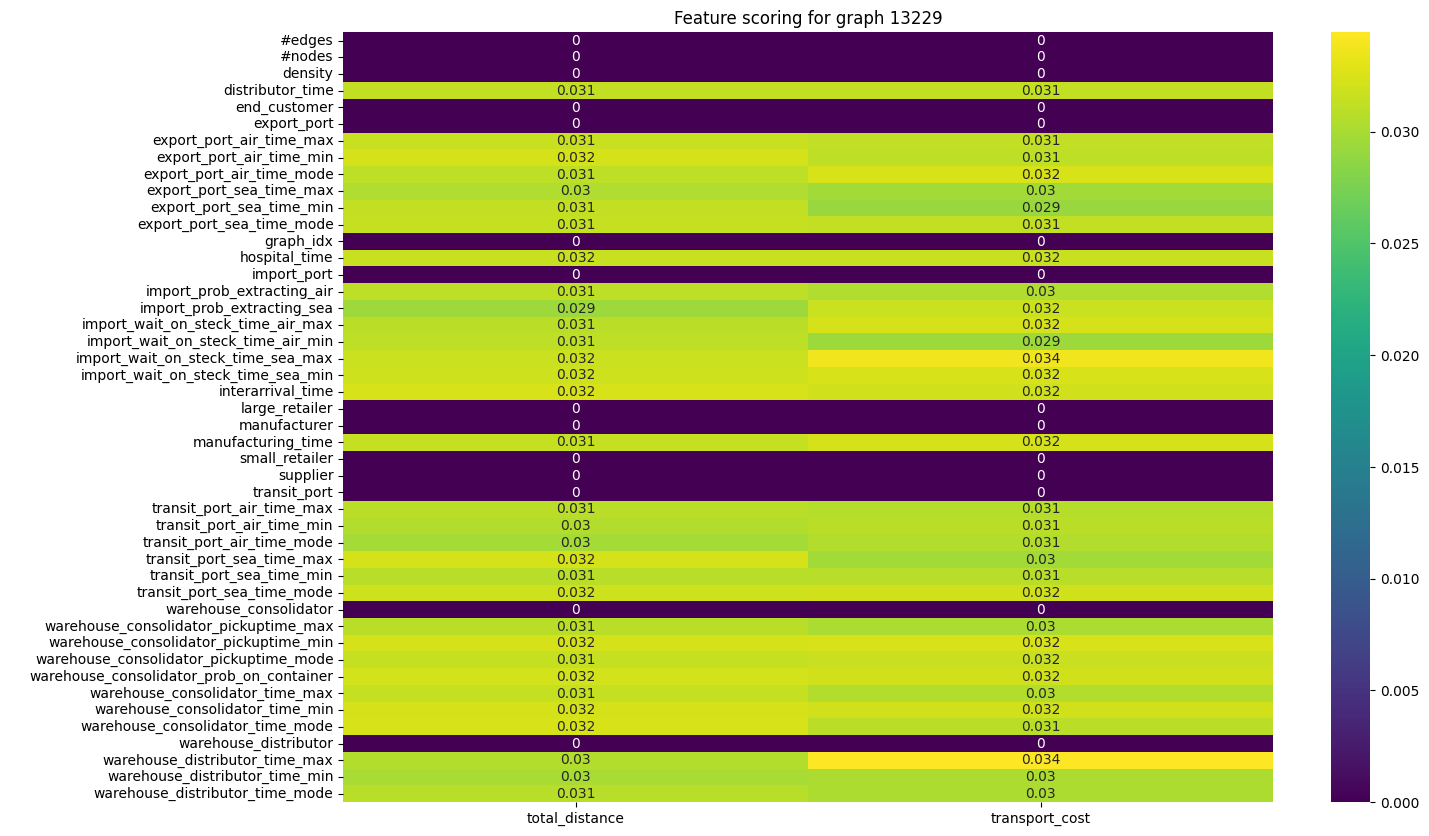

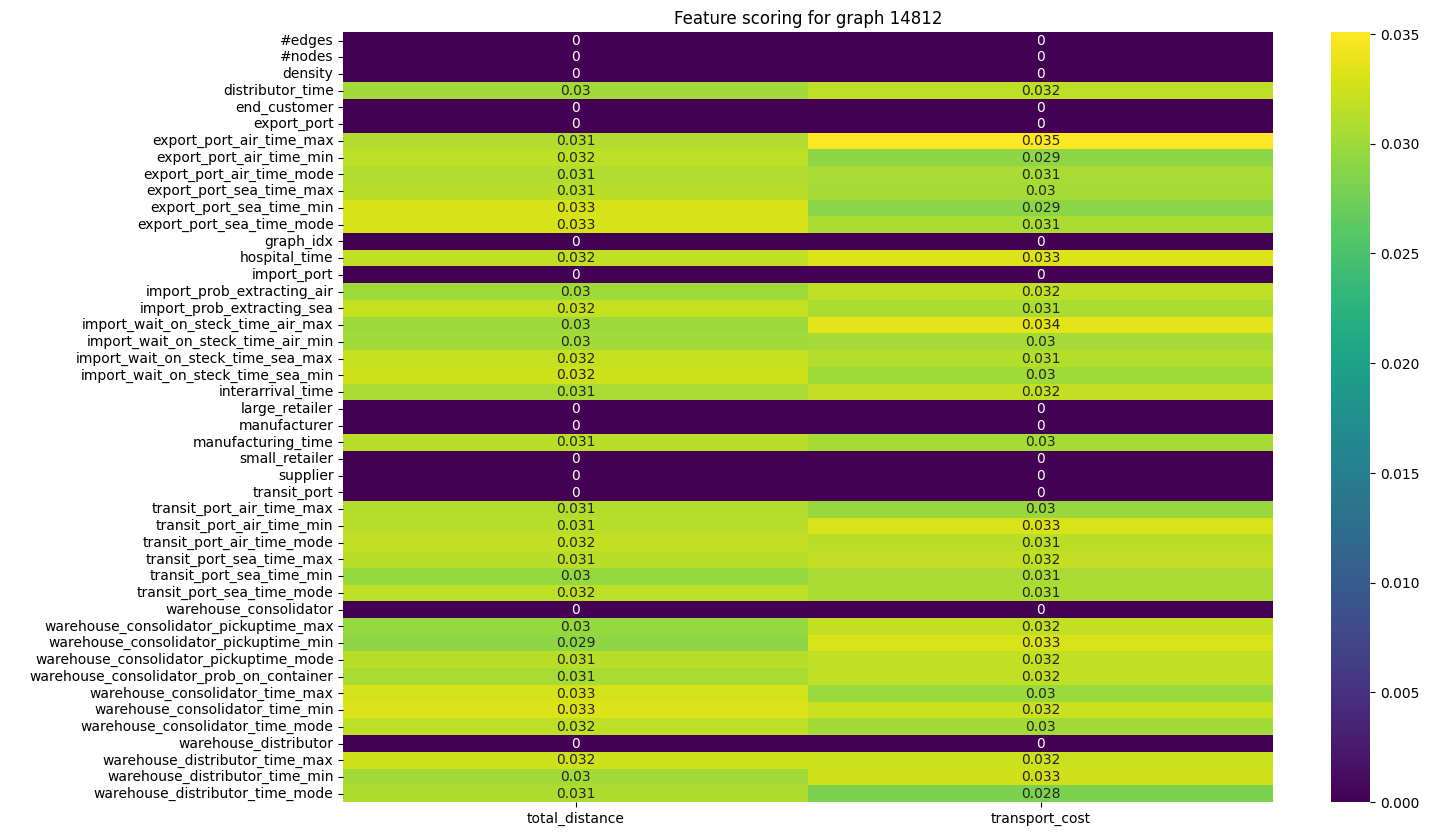

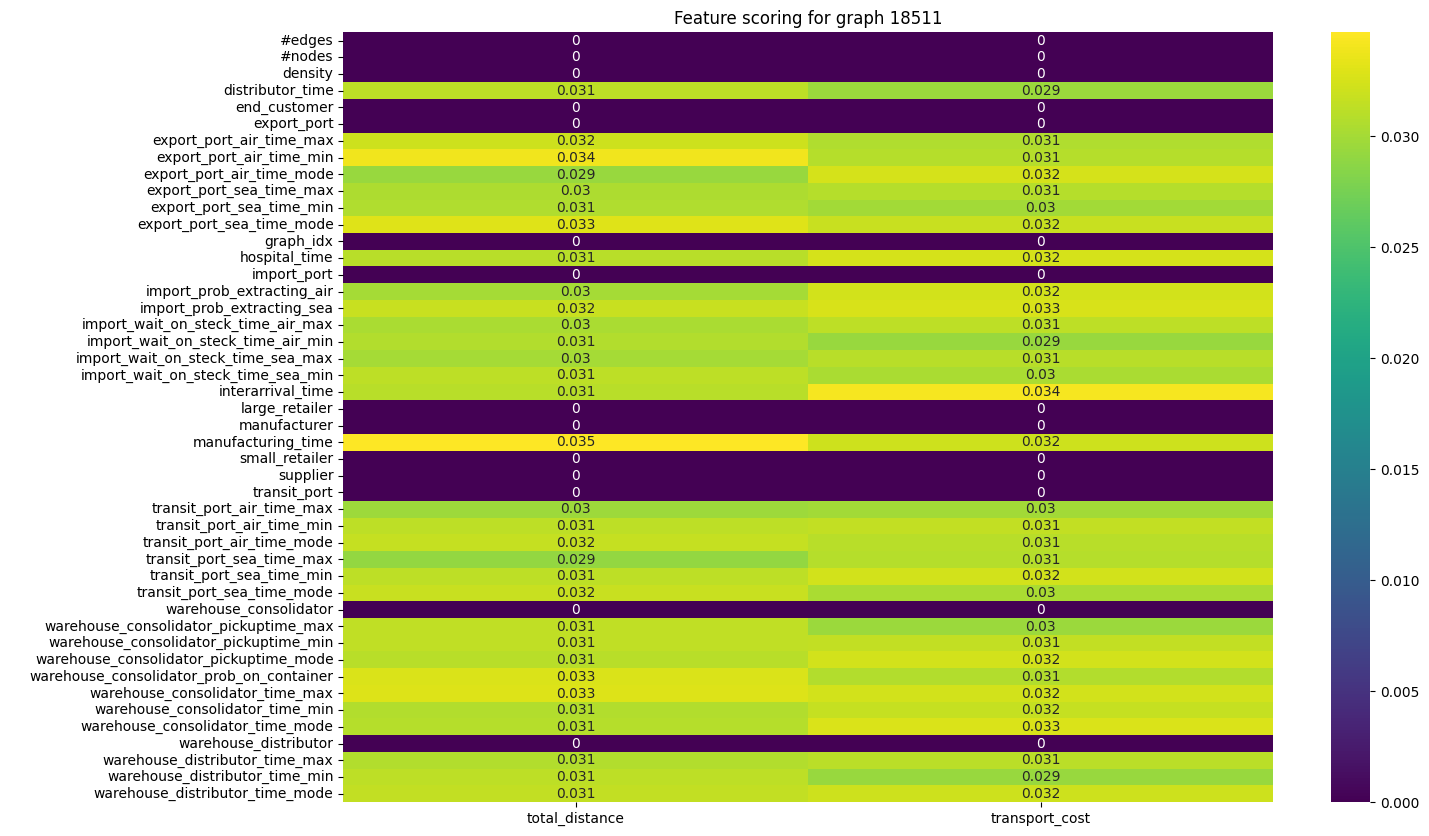

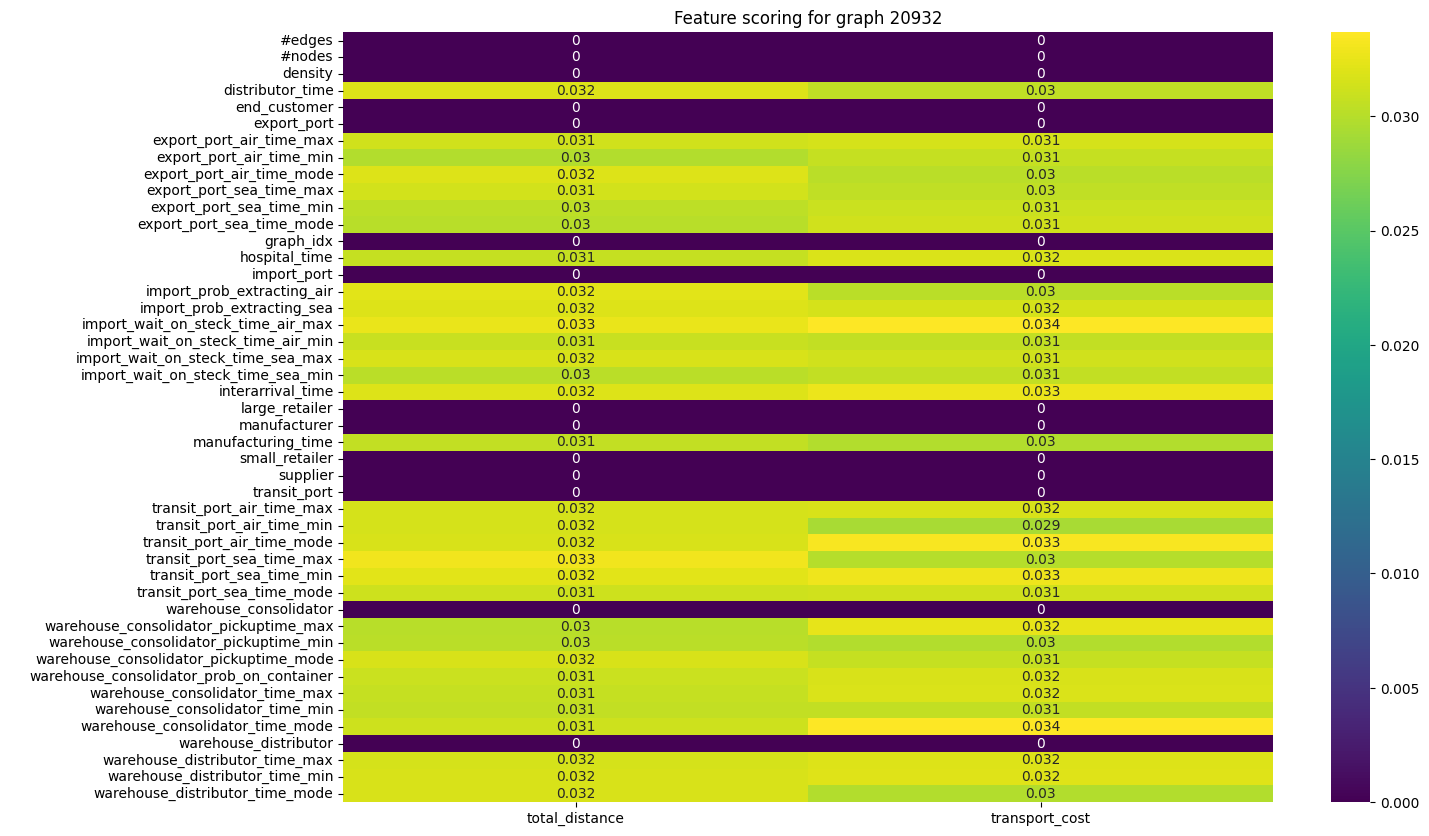

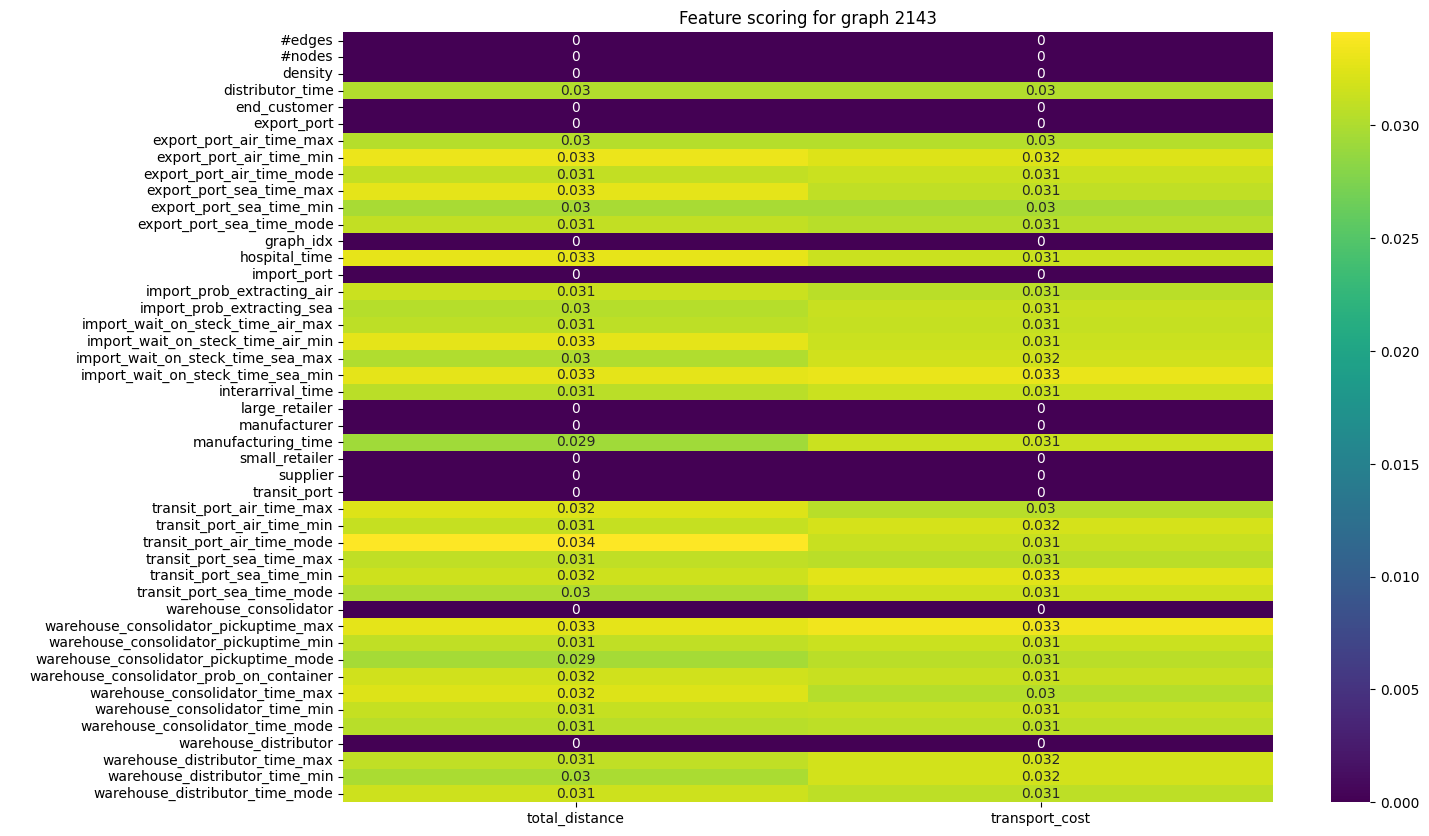

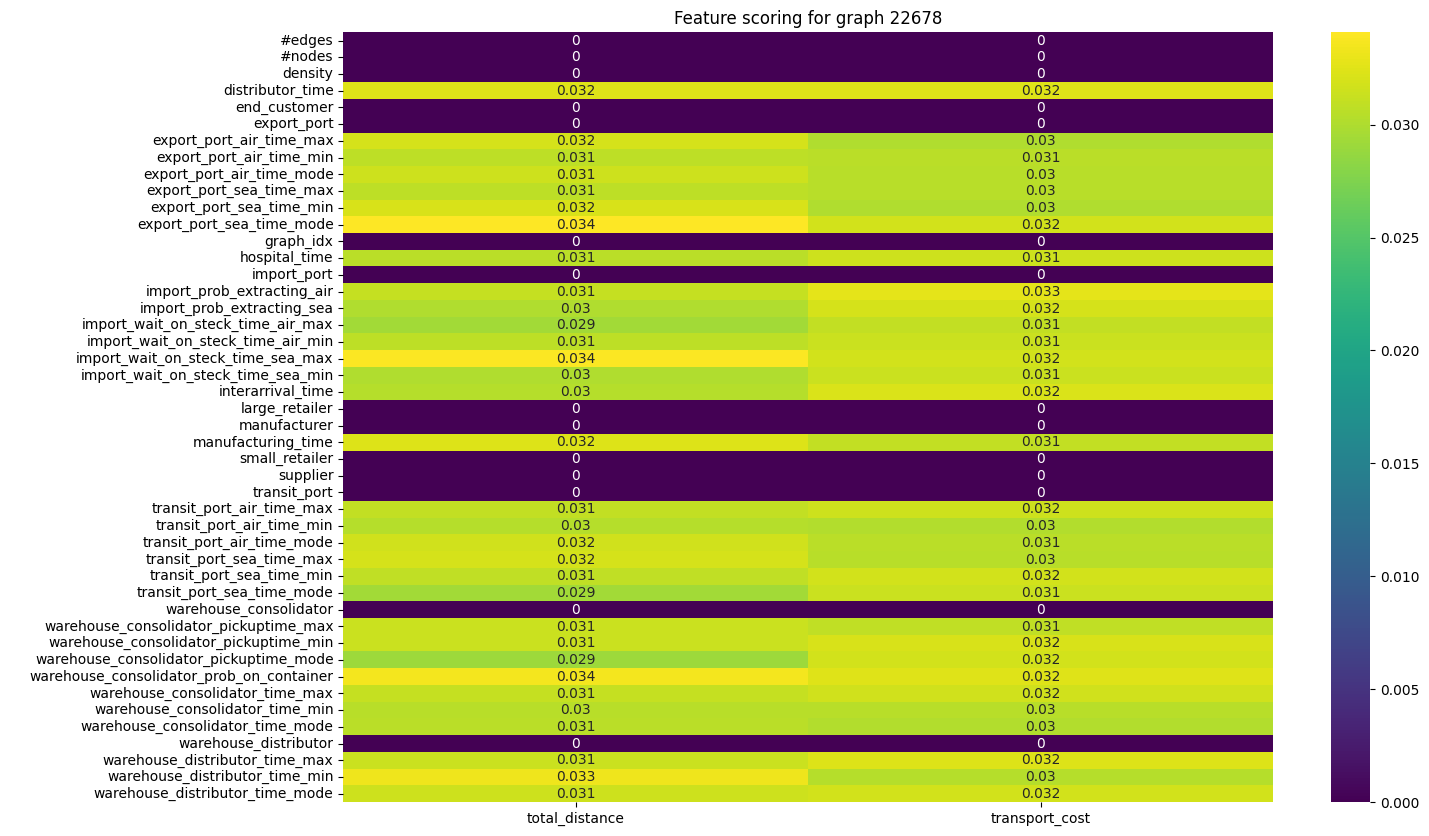

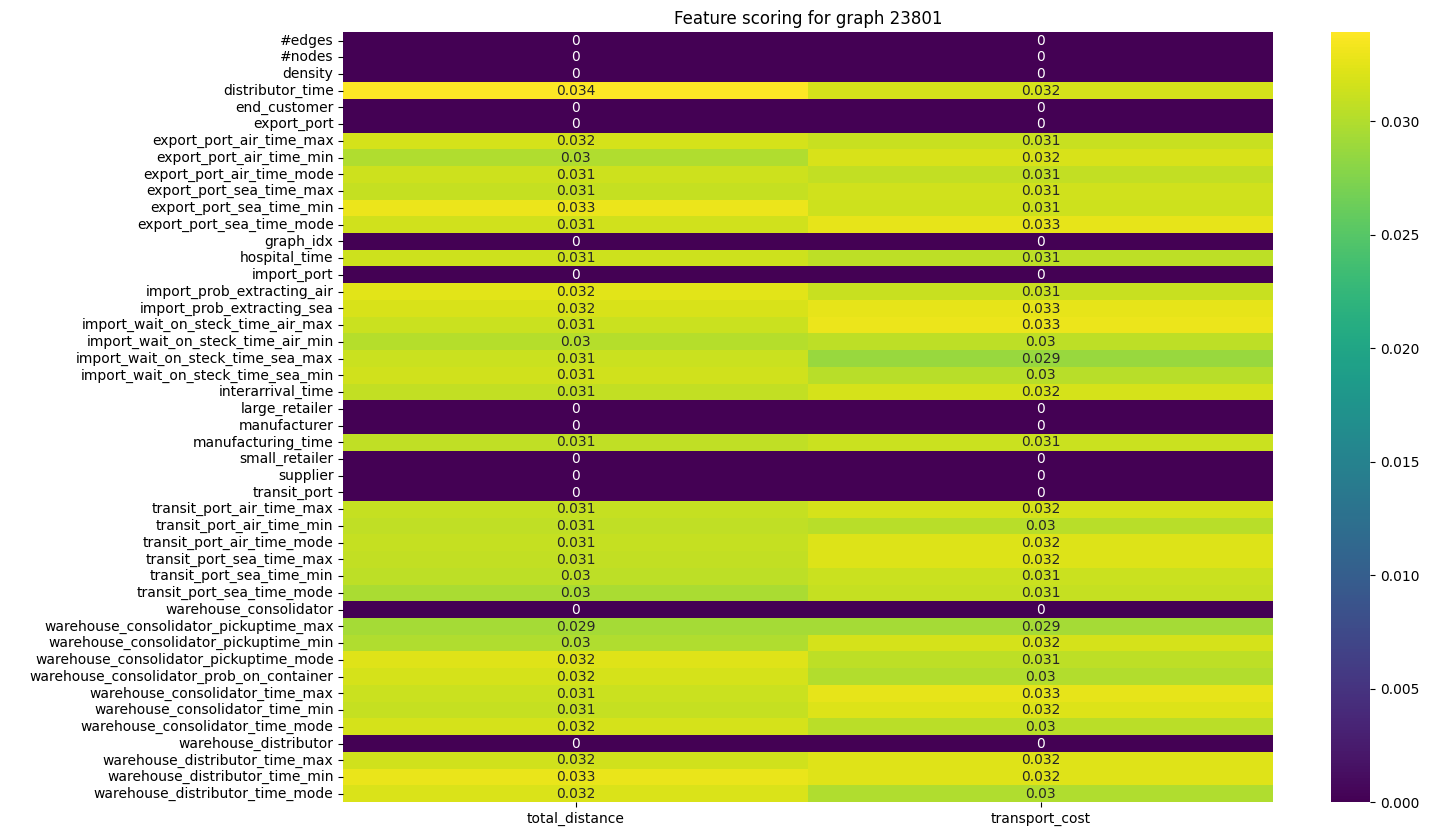


KeyboardInterrupt



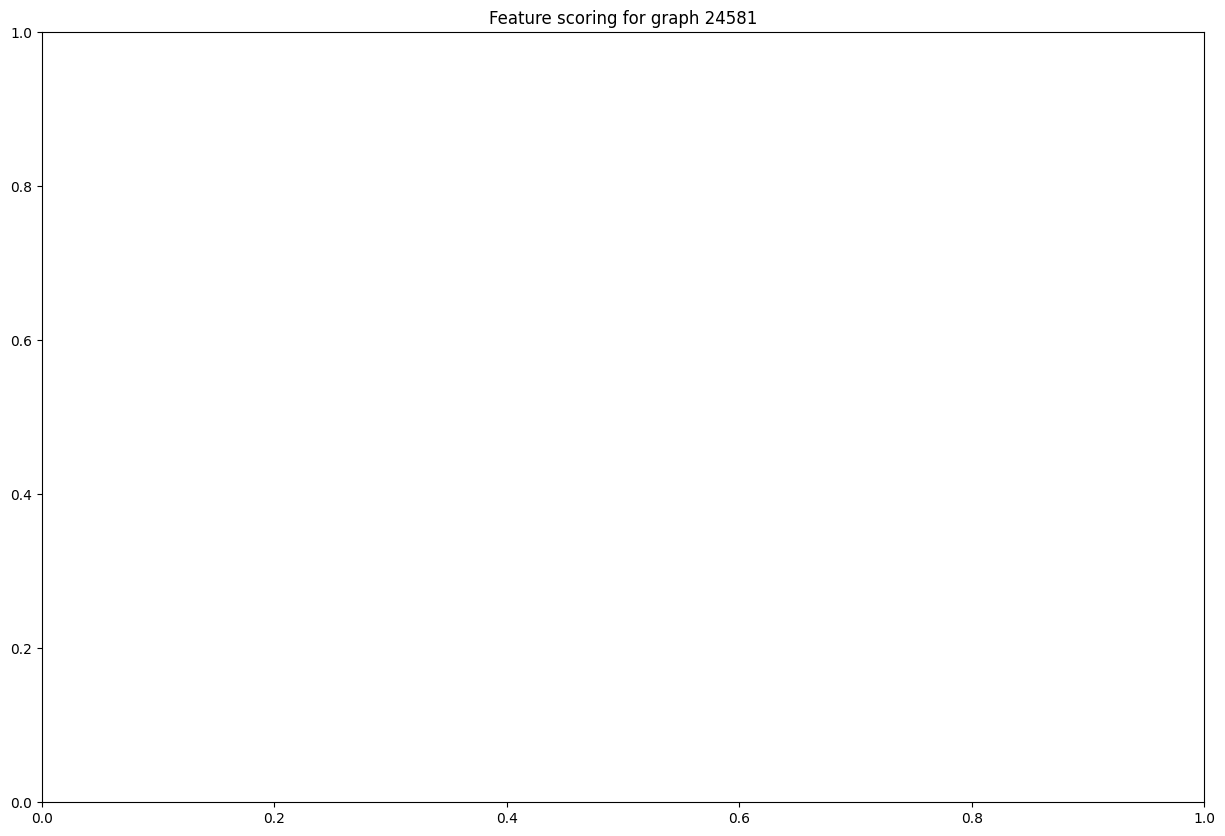

In [26]:
for graph, v in data.items():
    plt.figure(figsize=(15, 10))
    plt.title(f"Feature scoring for graph {graph}")
    fs = feature_scoring.get_feature_scores_all(v["experiments"], v["outcomes"])
    sns.heatmap(fs, cmap="viridis", annot=True)
    plt.ylabel(" ")
    #plt.savefig("./images/feature_scoring_ground_truth_2.png", bbox_inches='tight')
    plt.show()

## Structure of the network

Perform a feature scoring on the structure of networks -- on #nodes, #edges, dist, #suppliers, #manufacturers, #export ports etc. 

In [5]:
with open(r"../dec_var_qd_density_40000_cnhk_usa.pkl", "rb") as f:
    graphs = pickle.load(f)

In [6]:
# Save the graphs
current_graphs = {}

# current_graphs[37494] = graphs[37494]

for num in list(data.keys()):
    current_graphs[num] = graphs[num]

In [7]:
# Add graph edit distance to outcome
gt_graph = [v["graph"] for k,v in graphs.items() if v["hash"]=="ground_truth"][0]

def calculate_ged(gt, sol):
    # calculate graph edit distance
    ged=gm.GraphEditDistance(1,1,1,1) # all edit costs are equal to 1
    result=ged.compare([gt, sol],None) 
        
    #distance = ged.distance(result)[1][0]
    distance = np.sum(result)

    return distance

In [8]:
# Set attributes of graphs as part of the experiment
for num, v in data.items():
    v["experiments"]["graph_idx"] = num
    v["experiments"]["#vertices"] = current_graphs[num]["nodes"]
    v["experiments"]["#edges"] = current_graphs[num]["edges"]
    v["experiments"]["density"] = current_graphs[num]["density"]

    node_types = [data.get('node_type') for _, data in current_graphs[num]["graph"].nodes(data=True)]
    type_counts = Counter(node_types)
    for node_type, count in type_counts.items():
        v["experiments"][node_type] = count

    v["experiments"].rename(columns=lambda x: x.replace('wholesales_', 'warehouse_'), inplace=True)
    v["experiments"].rename(columns=lambda x: x.replace('large_retailer', 'distributor'), inplace=True)
    v["experiments"].rename(columns=lambda x: x.replace('small_retailer', 'hospital'), inplace=True)

    all_ged = np.array([calculate_ged(gt_graph, current_graphs[num]["graph"])]*len(v["experiments"]))
    v["outcomes"]["graph edit distance"] = all_ged

    v["outcomes"]["L1 distance"] = v["outcomes"].pop("total_distance")
    v["outcomes"]["kpi transport cost"] = v["outcomes"].pop("transport_cost")

del graphs

In [14]:
for num, v in data.items():
    try:
        v["experiments"].drop("#nodes")
    except KeyError:
        continue

In [15]:
#Combine all dataframe
out_keys = data[next(iter(data))]["outcomes"].keys()

all_exp = pd.concat([value["experiments"] for value in data.values()], ignore_index=True)
all_out = {k: np.concatenate([value["outcomes"][k] for value in data.values()]) for k in out_keys}

In [21]:
all_exp.iloc[:, -14:-1]

,#vertices,#edges,density,supplier,manufacturer,warehouse_consolidator,warehouse_distributor,distributor,hospital,end_customer,import_port,transit_port,export_port
0,23,29,0.057312,1,2,1,2,3,4,1,4,3,2
1,23,29,0.057312,1,2,1,2,3,4,1,4,3,2
2,23,29,0.057312,1,2,1,2,3,4,1,4,3,2
3,23,29,0.057312,1,2,1,2,3,4,1,4,3,2
4,23,29,0.057312,1,2,1,2,3,4,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134995,86,266,0.036389,5,2,1,5,1,8,1,14,31,18
134996,86,266,0.036389,5,2,1,5,1,8,1,14,31,18
134997,86,266,0.036389,5,2,1,5,1,8,1,14,31,18
134998,86,266,0.036389,5,2,1,5,1,8,1,14,31,18


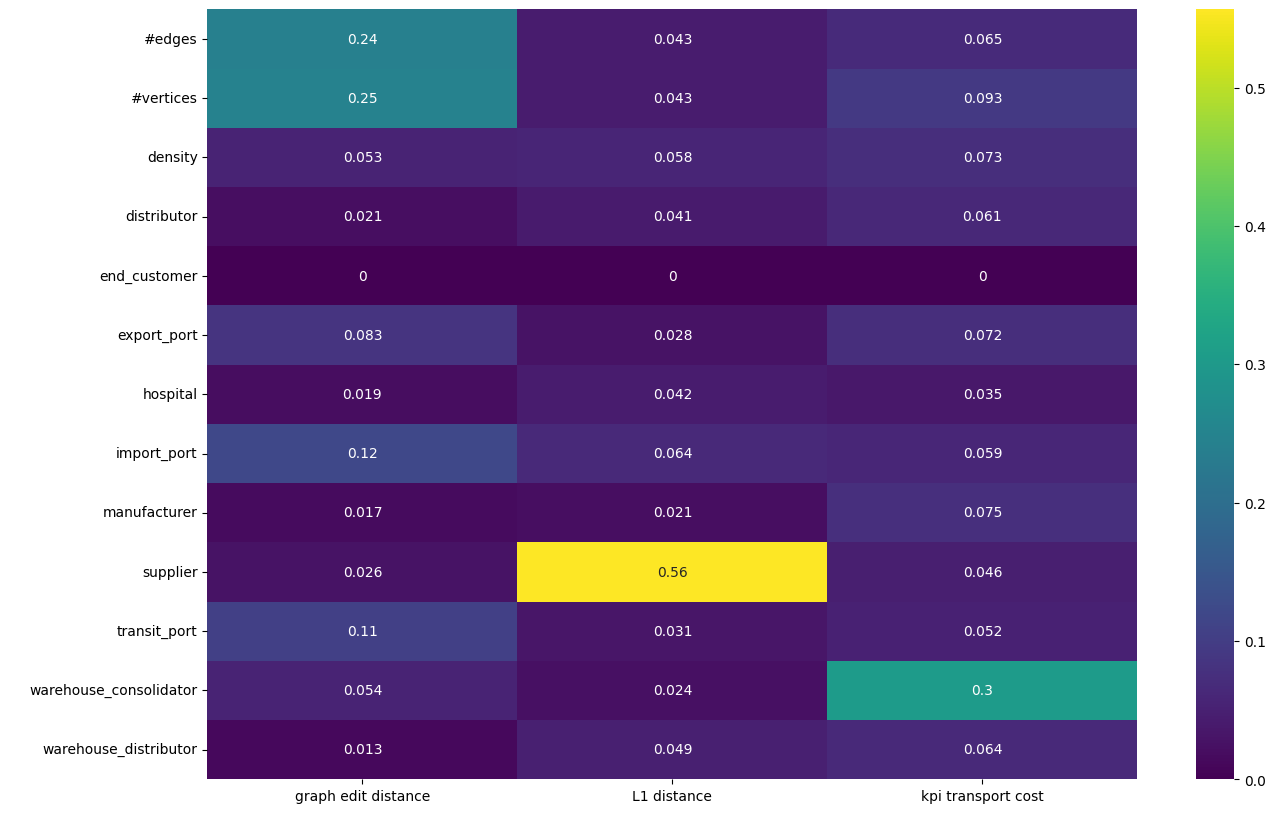

In [22]:
#Plot Structure
plt.figure(figsize=(15, 10))
fs = feature_scoring.get_feature_scores_all(all_exp.iloc[:, -14:-1], all_out)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.ylabel(" ")
plt.savefig("./images/feature_scoring_params_structure_number.png", bbox_inches='tight')
plt.show()

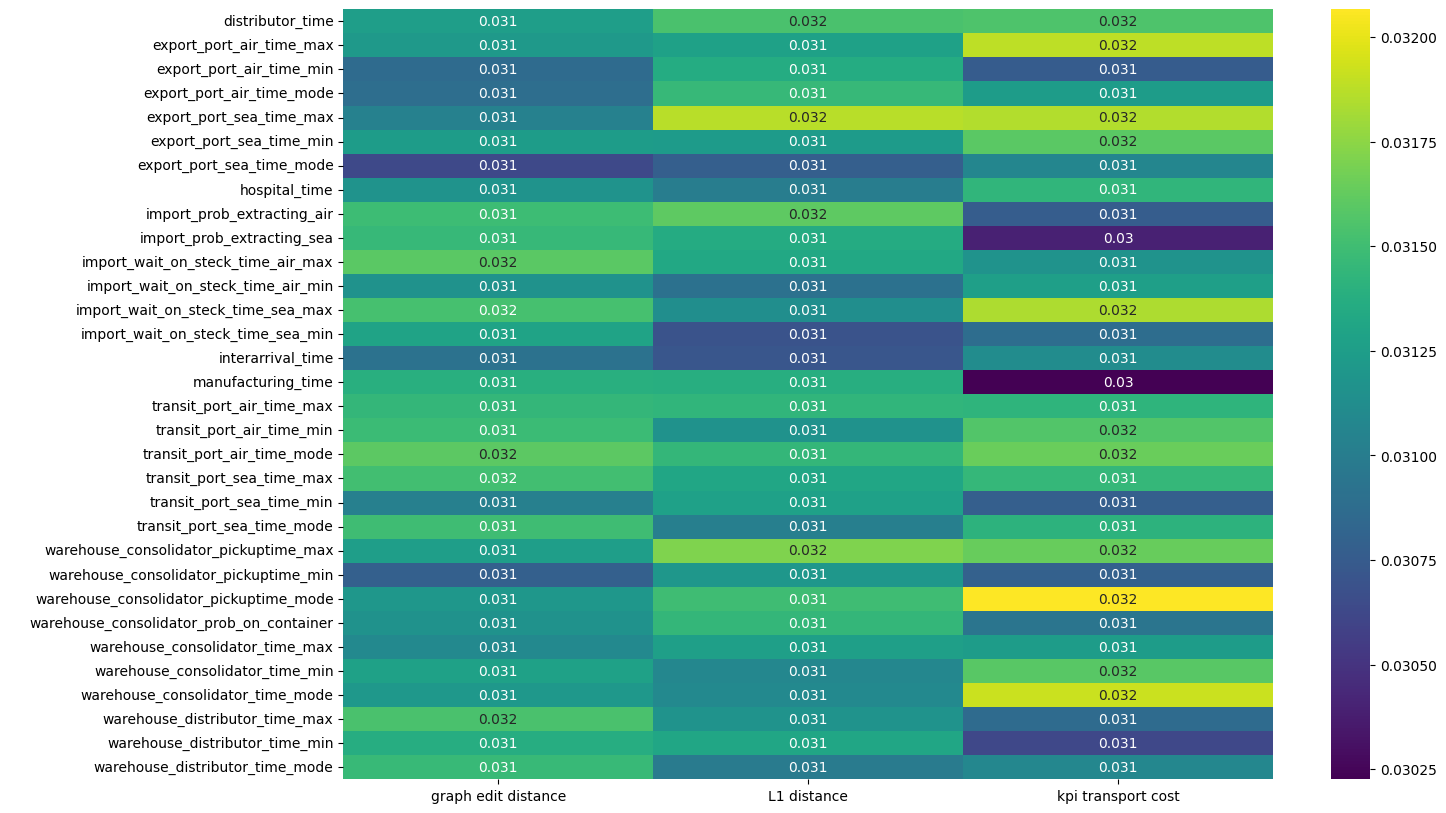

In [72]:
#Plot All
plt.figure(figsize=(15, 10))
fs = feature_scoring.get_feature_scores_all(all_exp.iloc[:, :-14], all_out)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.ylabel(" ")
plt.savefig("./images/feature_scoring_params_structure_params.png", bbox_inches='tight')
plt.show()